<a href="https://colab.research.google.com/github/stevejj4/Customer-Reward-Analysis/blob/main/Customers_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth #Authorizing google colab
auth.authenticate_user()
import gspread #credentials for google sheet
from google.auth import default
creds,_ = default()
gc = gspread.authorize(creds) #Authorizing the connection
import pandas as pd
worksheet = gc.open('Customers').sheet1 #defining the worksheet
rows = worksheet.get_all_values() #getting all values in list of row
df = pd.DataFrame(rows)
df.columns = df.iloc[0] #creating columns name
df = df.iloc[1:]

In [ ]:
df.head()

,customer_id,became_member_on,gender,age,income
1,68be06ca386d4c31939f3a4f0e3dd783,20170212,,118,
2,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000
3,38fe809add3b4fcf9315a9694bb96ff5,20180712,,118,
4,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000
5,a03223e636434f42ac4c3df47e8bac43,20170804,,118,


In [ ]:
print("Shape of the data: ", df.shape)

Shape of the data:  (17000, 5)


In [ ]:
#Check if there are duplicates in customer_id and find there sum
df.duplicated(subset=['customer_id']).sum()



0

In [ ]:
# summary Statistics
df.describe()

,customer_id,became_member_on,gender,age,income
count,17000,17000,17000,17000,17000
unique,17000,1716,4,85,92
top,68be06ca386d4c31939f3a4f0e3dd783,20171207,M,118,
freq,1,43,8484,2175,2175


In [ ]:
#checking datatype
df.dtypes

,0
0,
customer_id,object
became_member_on,object
gender,object
age,object
income,object


In [ ]:
# Customer id is the primary key

# became_member_on shuld to date with format yy-mm-dd
# gender is categorical
# age to int
# income to float
# Convert 'became_member_on' to datetime
df['became_member_on'] = pd.to_datetime(df['became_member_on'], format='%Y%m%d') # Changed format to '%Y%m%d'

# Convert 'gender' to categorical
df['gender'] = pd.Categorical(df['gender'])

# Convert 'age' to integer
df['age'] = df['age'].astype(int)

# Convert 'income' to float, handling potential errors
df['income'] = pd.to_numeric(df['income'], errors='coerce').fillna(0).astype(float) # Changed astype(int) to astype(float) and added error handling

In [9]:
# Check the gender distribution in pie chart(comprehensive)
df.dtypes

,0
0,
customer_id,object
became_member_on,datetime64[ns]
gender,category
age,int64
income,float64


In [27]:
df.head()

,customer_id,became_member_on,gender,age,income,age_group
2,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0,Senior (54-71)
4,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0,Elderly (72-89)
6,e2127556f4f64592b11af22de27a7932,2018-04-26,M,68,70000.0,Senior (54-71)
9,389bc3fa690240e798340f5a15918d5c,2018-02-09,M,65,53000.0,Senior (54-71)
13,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,M,58,51000.0,Senior (54-71)


In [21]:
# missing values
df.isnull().sum()

,0
0,
customer_id,0
became_member_on,0
gender,0
age,0
income,0
age_group,0


In [11]:
# Gender distribution
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
M    8484
F    6129
     2175
O     212
Name: count, dtype: int64


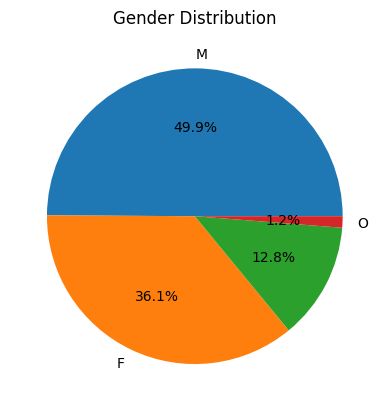

In [13]:
# Gender represented in pie chart
# include the legend
import matplotlib.pyplot as plt
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


In [15]:
# Age statistics the min, max, median, mode, mean
age_stats = df['age'].describe()
print(age_stats)

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64


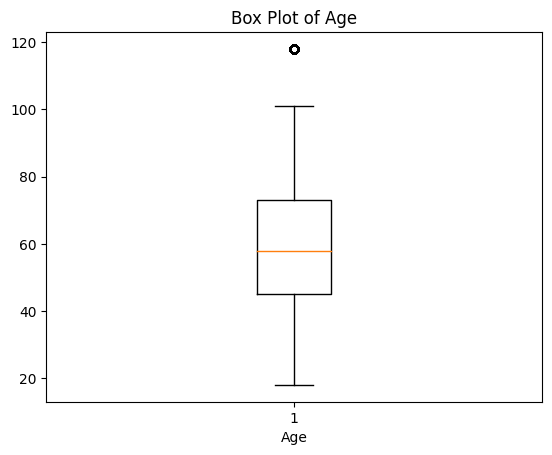

In [16]:
# Box plot to see outliers and treat them
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

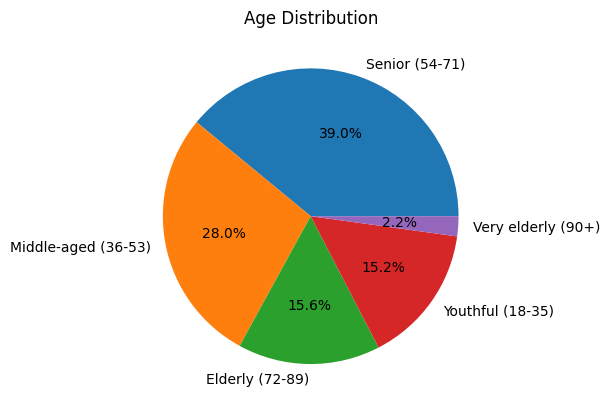

In [29]:
# Define age groups
age_bins = [18, 35, 53, 71, 89, float('inf')]
age_labels = ['Youthful (18-35)', 'Middle-aged (36-53)', 'Senior (54-71)', 'Elderly (72-89)', 'Very elderly (90+)']

# Categorize ages
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate distribution
age_distribution = df['age_group'].value_counts()

# Pie chart
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

In [24]:
# Calculate the total income of customers who are 102 years and above
total_income_above_102 = df[df['age'] >= 102]['income'].sum()
print(f"Total income of customers 102 years and above: ${total_income_above_102:.2f}")

Total income of customers 102 years and above: $0.00


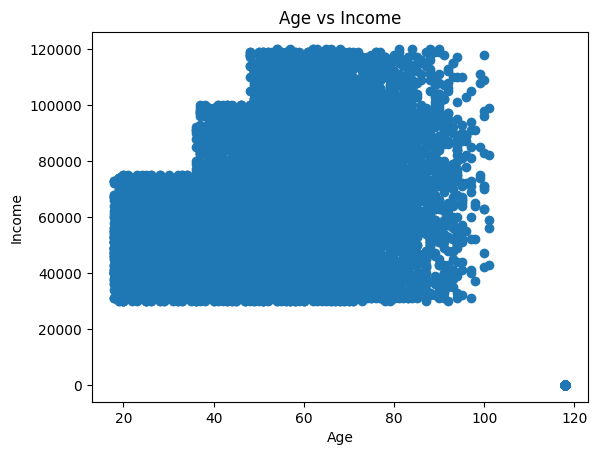

In [14]:
# Scatter plot to see age
plt.scatter(df['age'], df['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

In [19]:
# income statistics the min, max, median, mode, mean
income_stats = df['income'].describe()
print(income_stats)

count     17000.000000
mean      57037.000000
std       29734.044501
min           0.000000
25%       40000.000000
50%       59000.000000
75%       76000.000000
max      120000.000000
Name: income, dtype: float64


In [20]:
# median income distribution per age_group
median_income_by_age_group = df.groupby('age_group')['income'].median()
print(median_income_by_age_group)

age_group
youthful (18-35)       50000.0
middle-aged (36-53)    61000.0
senior (54-71)         70000.0
elderly (72-89)        71000.0
very elderly (90+)         0.0
Name: income, dtype: float64


<ipython-input-20-d2cc5ff02a30>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_income_by_age_group = df.groupby('age_group')['income'].median()


In [30]:
df.head()

,customer_id,became_member_on,gender,age,income,age_group
2,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0,Senior (54-71)
4,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0,Elderly (72-89)
6,e2127556f4f64592b11af22de27a7932,2018-04-26,M,68,70000.0,Senior (54-71)
9,389bc3fa690240e798340f5a15918d5c,2018-02-09,M,65,53000.0,Senior (54-71)
13,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,M,58,51000.0,Senior (54-71)


In [36]:
import pandas as pd

# Assuming 'became_member_on' is a string representing dates, convert it to datetime objects
df['became_member_on'] = pd.to_datetime(df['became_member_on'])

# Extract the year from the 'became_member_on' column
df['join_year'] = df['became_member_on'].dt.year

# Group by join year and age group, then count members
age_group_distribution = df.groupby(['join_year', 'age_group'])['age'].count().unstack()

# Calculate total members per year
age_group_distribution['total_members'] = age_group_distribution.sum(axis=1)

age_group_distribution

<ipython-input-36-dcba8f5f8604>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_distribution = df.groupby(['join_year', 'age_group'])['age'].count().unstack()


age_group,Youthful (18-35),Middle-aged (36-53),Senior (54-71),Elderly (72-89),Very elderly (90+),total_members
join_year,,,,,,
2013,53,81,96,41,3,274
2014,137,197,238,84,6,662
2015,228,452,625,256,36,1597
2016,326,798,1296,524,80,3024
2017,875,1574,2165,860,125,5599
2018,637,1049,1366,543,74,3669


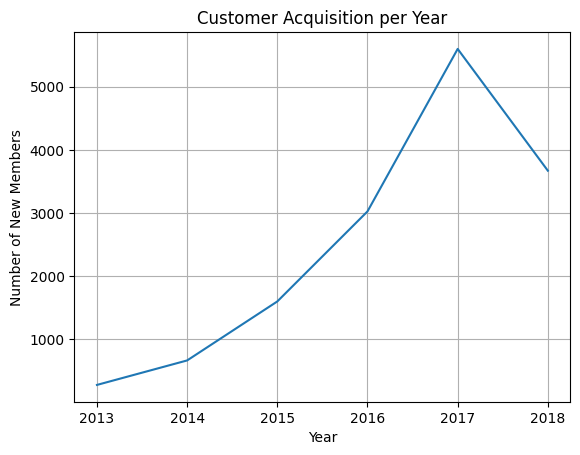

In [39]:
# Count the number of members who joined each year
member_join_per_year = df['join_year'].value_counts().sort_index()

# Create the line plot
plt.plot(member_join_per_year.index, member_join_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of New Members')
plt.title('Customer Acquisition per Year')
plt.grid(True)  # Add a grid for better readability
plt.show()